In [ ]:
import numpy as np
import scipy
from scipy import interpolate
from scipy.io import savemat
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def knee_angle_to_stance(percentages_in):
        '''
        Create a function that relates knee angle to stance percentage using
        angle_data, accounting for nonlinear change in knee angle while 
        standing. Percentages go from ~0% to ~100% going from sit to stand.
        If no input percentages are provided, produces knee angles using evenly
        spaced percentages with same number of indices as sit data.
        '''
        angle_data = 'data/Knee-angle_Chugo_2006.csv'
        knee_array = np.loadtxt(angle_data, delimiter = ',', ndmin = 2)
        percentages = knee_array[:, 0]
        knee_angles = knee_array[:, 1]
        knee_fcn = interpolate.interp1d(percentages, knee_angles,
                                        kind='cubic', fill_value='extrapolate')
        knee_angles = knee_fcn(percentages_in)
        return knee_angles
    
def percentage_to_x(percentages_in, stroke):
    # Generate knee angles corresponding to stance percentage.
    knee_angles = knee_angle_to_stance(percentages_in)

    # Map transmission cable stroke to stance percentage.
    x_cable_original = (stroke * (1 - (knee_angles - np.min(knee_angles))
                                / np.ptp(knee_angles))) 
    return x_cable_original

(0.0, 100.0)

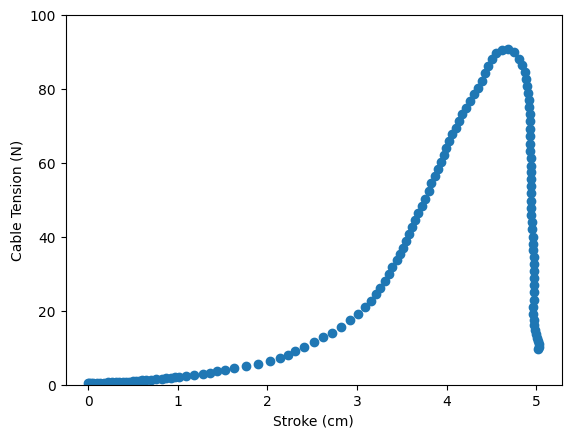

In [ ]:
# Determine stroke
user_height = 1.654
unstretch_len = 0.05
stretch_pct = 1.016
user_height_ref = 1.67
stroke = user_height / user_height_ref * unstretch_len * stretch_pct

# Load file that includes stance percentage in first column and forces in second column
force_percent_data = 'data/force_plot_63_extracted.csv'
force_percent_array = np.loadtxt(force_percent_data, delimiter = ',', ndmin = 2)
percent_stance = force_percent_array[:, 0]
F_cable = force_percent_array[:, 1] / 2 # divide by two because original code was for full suit force

# Convert from stance percentage to linear displacement
x_cable = percentage_to_x(force_percent_array[:, 0], stroke)

In [ ]:
# Plot data

plt.figure()
plt.scatter(x_cable * 100, F_cable)
plt.xlabel('Stroke (cm)')
plt.ylabel('Cable Tension (N)')
plt.ylim((0, 100))

In [ ]:
# Export data  for analysis and visualization in MATLAB
save_dict = {'F': F_cable,
             'x': x_cable}
scipy.io.savemat('si2st_force_63.mat', save_dict)